<a href="https://colab.research.google.com/github/gurusurya946/FML/blob/main/Phishing_Legitimate_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_csv('Phishing_Legitimate_full.csv')

In [4]:
data.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [6]:
data.isnull().sum()

id                                    0
NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0


In [11]:
X=data.drop('CLASS_LABEL',axis=1).values
y=data['CLASS_LABEL'].values
print(y)
print(X)

[1 1 1 ... 0 0 0]
[[ 1.000e+00  3.000e+00  1.000e+00 ...  1.000e+00 -1.000e+00  1.000e+00]
 [ 2.000e+00  3.000e+00  1.000e+00 ...  1.000e+00  1.000e+00  1.000e+00]
 [ 3.000e+00  3.000e+00  1.000e+00 ...  1.000e+00 -1.000e+00  0.000e+00]
 ...
 [ 9.998e+03  2.000e+00  1.000e+00 ...  1.000e+00  0.000e+00  1.000e+00]
 [ 9.999e+03  3.000e+00  1.000e+00 ...  1.000e+00  0.000e+00  1.000e+00]
 [ 1.000e+04  3.000e+00  1.000e+00 ...  1.000e+00  1.000e+00  1.000e+00]]


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [13]:
X_train.reshape(-1,1)
y_train.reshape(-1,1)
reg=LogisticRegression(C=0.5)
reg.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.5)

In [14]:
reg.coef_

array([[-2.08085873e-03,  6.20124251e-01, -1.41521644e-01,
         5.14597205e-01,  4.62047308e-01, -9.33135627e-01,
         3.33501994e-02, -4.80961210e-04,  1.58169774e-02,
        -2.10078862e-01, -1.60507144e-02, -1.45108975e-01,
        -6.27461539e-02,  1.37389141e-03,  7.08608874e-02,
         2.46354142e-01, -3.93975552e-02,  1.44408349e-02,
        -1.17027821e-02, -2.38220968e-02,  0.00000000e+00,
        -2.84453078e-01, -4.73145485e-01, -4.71797103e-01,
         6.31927383e-05,  1.20698923e-01,  5.50962305e-02,
         1.78171941e-01,  1.10899622e-01,  9.54130748e-02,
         3.98173370e-01,  2.13021386e-02,  8.43522865e-03,
        -2.26952495e-02,  1.46276175e-01,  2.96759348e-01,
        -2.94057226e-03,  6.05787612e-03, -6.23237293e-03,
        -1.15258894e-01, -8.96091915e-02,  5.18986610e-02,
         1.15413504e-02,  3.11739087e-01,  6.00613717e-01,
         1.01981561e-01,  2.93047829e-01,  1.02239607e-01,
        -4.77567528e-01]])

In [16]:
reg.intercept_scaling

1

In [17]:
reg.predict_proba(X_train)

array([[1.31614643e-01, 8.68385357e-01],
       [2.05834123e-01, 7.94165877e-01],
       [9.99987764e-01, 1.22355957e-05],
       ...,
       [8.08572308e-01, 1.91427692e-01],
       [1.49438453e-04, 9.99850562e-01],
       [9.96097991e-01, 3.90200889e-03]])

In [18]:
y_predict=reg.predict(X_test)
print(y_predict)

[0 1 1 ... 0 0 1]


In [19]:
reg.score(X_test, y_test)

0.9756

In [20]:
confusion_matrix(y_test,y_predict)

array([[1204,   24],
       [  37, 1235]])

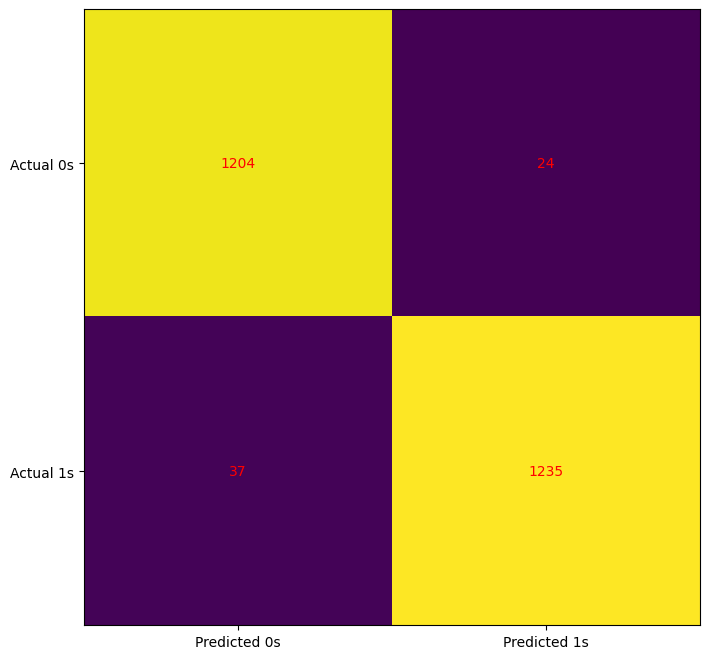

In [21]:
cm=confusion_matrix(y_test,y_predict)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [22]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1228
           1       0.98      0.97      0.98      1272

    accuracy                           0.98      2500
   macro avg       0.98      0.98      0.98      2500
weighted avg       0.98      0.98      0.98      2500

